# Week 8: Intro to Simple Machine Learning Models

This week introduces three core machine learning models using `scikit-learn`:  
- Linear Regression (for regression tasks)  
- Decision Tree Classifier (for classification)  
- Logistic Regression (for classification)

---

## Learning Objectives

- Understand the supervised learning pipeline
- Train, test, and evaluate classification and regression models
- Interpret model performance using accuracy or mean squared error
- Visualize decision tree structures
- Use scikit-learn's API to implement models

---

## Topics Covered

### 1. Supervised Learning Basics
- Features (`X`) and target (`y`)
- Train-test split using `train_test_split`
- Model training and prediction
- Evaluation using accuracy or mean squared error

---

## Models Introduced

### 🔹 Linear Regression
- Predicts a continuous numerical value
- Fits a line to minimize squared error
- Metric: `mean_squared_error`

### 🔹 Decision Tree Classifier
- Learns decision rules from features
- Easy to visualize and interpret
- Metric: `accuracy_score`

### 🔹 Logistic Regression
- Used for binary classification
- Predicts probabilities, then thresholds to output class labels
- Metric: `accuracy_score`

---

## Hands-On Tasks

Use the following datasets:
- Synthetic or numeric dataset (for regression)
- Iris(for classification models)
---


### 🔹 Linear Regression
- Predicts a continuous numerical value
- Fits a line to minimize squared error
- Metric: `mean_squared_error`
- [Linear Regression 2D Image](https://web.stanford.edu/class/stats202/notes/Linear-regression/Simple-linear-regression.html)

In [21]:
# !pip install sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("HDB_dataset.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6000 non-null   int64  
 1   resale_price                 6000 non-null   float64
 2   floor_area_sqm               6000 non-null   float64
 3   Remaining_lease              6000 non-null   int64  
 4   Dist_nearest_station         6000 non-null   float64
 5   Dist_nearest_primary_school  6000 non-null   float64
 6   Dist_nearest_GHawker         6000 non-null   float64
 7   Dist_CBD                     6000 non-null   float64
 8   flat_type_category           6000 non-null   object 
 9   storey_category              6000 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 468.9+ KB


In [23]:
data.head()

,Unnamed: 0,resale_price,floor_area_sqm,Remaining_lease,Dist_nearest_station,Dist_nearest_primary_school,Dist_nearest_GHawker,Dist_CBD,flat_type_category,storey_category
0,0,395000.0,84.0,67,1.008453,0.447115,0.482185,6.717383,flat_type_4.ROOM,storey_range_01.TO.03
1,1,675000.0,146.0,66,1.176052,0.188651,1.930232,15.699330,flat_type_EXECUTIVE,storey_range_10.TO.12
2,2,413000.0,101.0,77,0.460362,0.220392,3.662314,12.824040,flat_type_4.ROOM,storey_range_13.TO.15
3,3,350000.0,64.0,65,0.682939,0.260424,0.676288,6.830667,flat_type_3.ROOM,storey_range_01.TO.03
4,4,728000.0,123.0,76,0.673447,0.127896,0.972390,7.998324,flat_type_5.ROOM,storey_range_07.TO.09


### Create a Linear Regression Model to predict price of house
Steps:
1) Decide which features you want to use
2) Split the data into Train(80%) and Test(20%)
3) Model training and Prediction
4) Evaulation

In [ ]:
features = [
"floor_area_sqm"] #step1


In [26]:
# Step 2: Split data into Train and Test
from sklearn.model_selection import train_test_split

# X = features, y = target
X = data[features]        # feature columns
y = data["resale_price"]         # target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 15577694477.168163


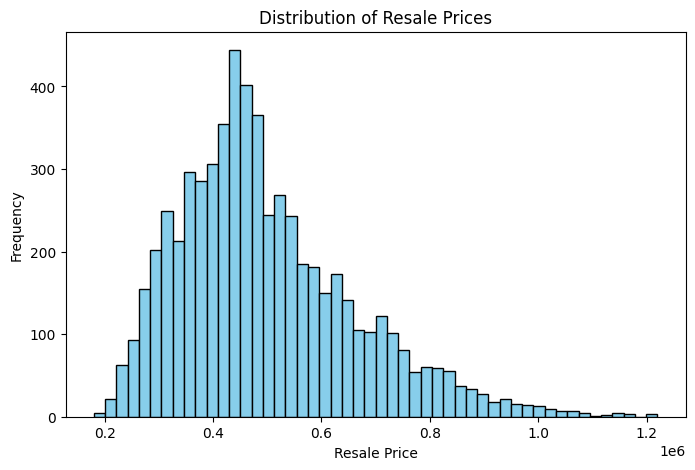

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data["resale_price"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Resale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Resale Prices")
plt.show()


In [ ]:
import numpy as np
data["log_resale_price"] = np.log1p(data["resale_price"]) # Log the data for better input

# X = features, y = target
X = data[features]        # feature columns
y = data["log_resale_price"]         # target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0532915678926411
